# Problem Statement
A retail company wants to forecast monthly passengers for the next 12 months.
Accurate forecasts will help them:

You are hired as a Data Analyst to:

- Understand the passengers pattern

- Check if data is forecast-ready

- Build a reliable ARIMA-family model

- Generate business-ready forecasts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
)

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
# Jan - 1949 -> Dec 1960

# How many months ?

# 12 years -> 144 months

In [ ]:
df.shape

(144, 2)

In [ ]:
# Change date column to datetime datatype

In [ ]:
df['Month'][1]

'1949-02'

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


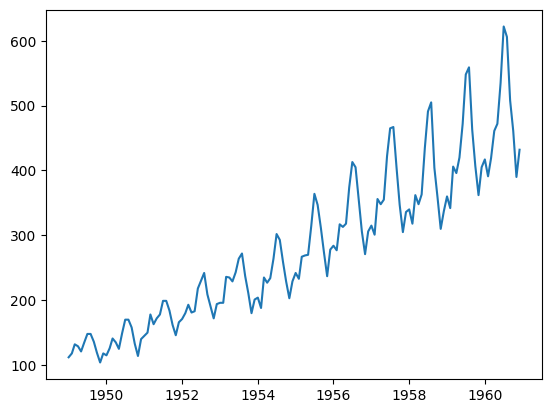

In [ ]:
plt.plot(df, label='Passengers Count')
plt.show()

# Time Series Decomposition

In [ ]:
# Trend, Seasonality, Error (Residual)

import statsmodels.api as sm

sm_model = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive')

# sm_model.plot()


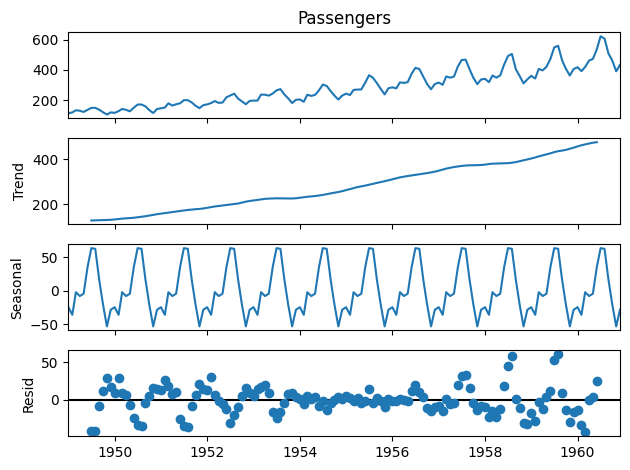

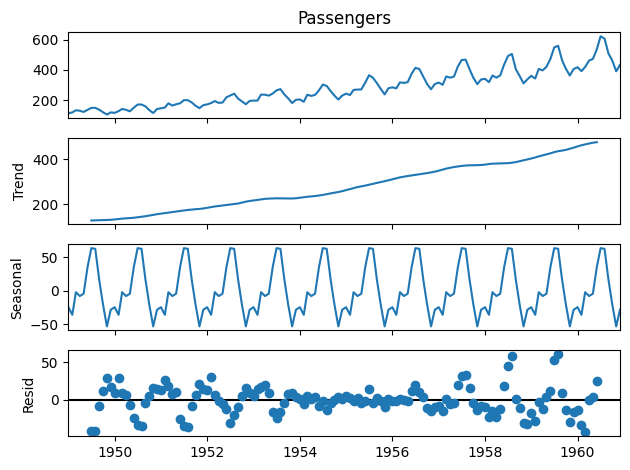

In [ ]:
sm_model.plot()

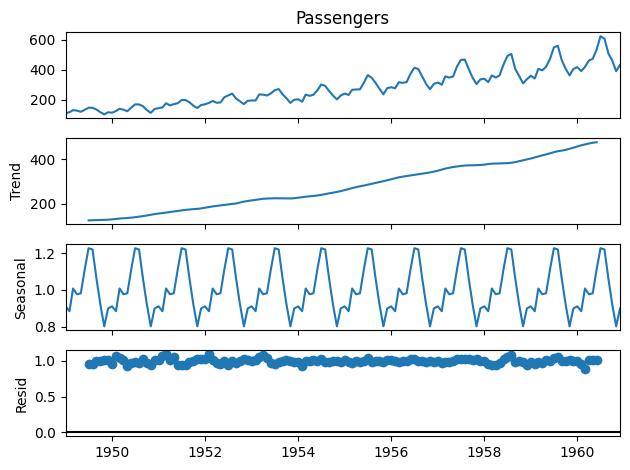

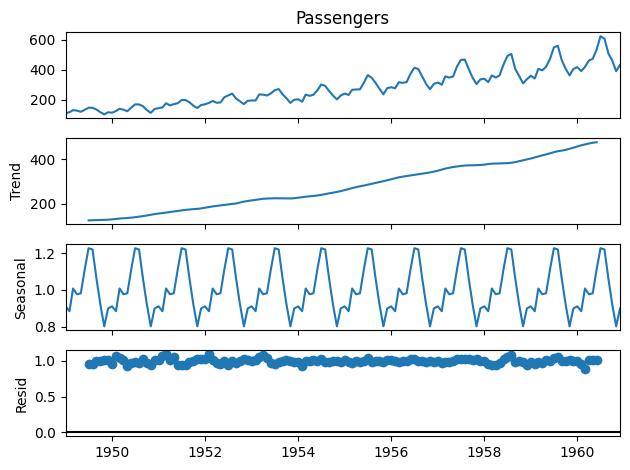

In [ ]:
sm_model = sm.tsa.seasonal_decompose(df['Passengers'], model = 'multiplicative')

sm_model.plot()


In [ ]:
# Trend → Long-term business growth

# Seasonality → Repeating yearly demand pattern

# Residual → Noise (unexpected demand)

# Smoothing - Moving Averages

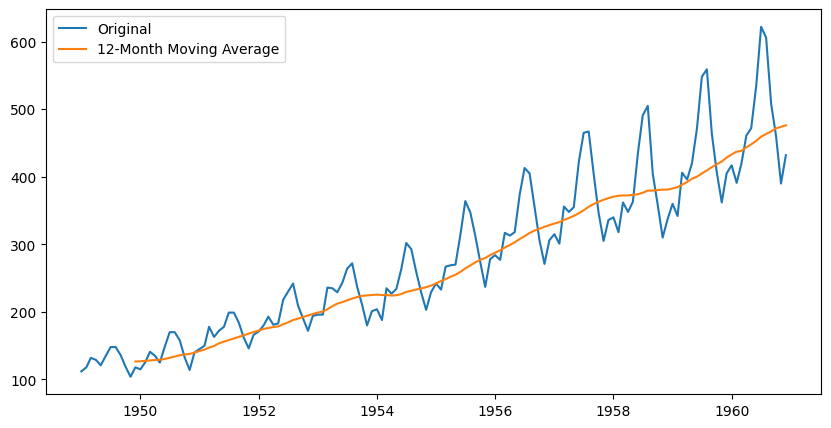

In [ ]:
# Implement moving average with k = 12 (window_size)

df['MA_12'] = df['Passengers'].rolling(window = 12).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['MA_12'], label='12-Month Moving Average')
plt.legend()
plt.show()

In [ ]:
# Smoothing reduces noise
# Helps reveal true trend

# Not used directly for forecasting here, but crucial for understanding behavior

# Stationarity -> ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# p_value <= 0.05 -> Time Series is Stationary
# p_value > 0.05 -> TS is Non - Stationary

p_value = adfuller(df['Passengers'])[1]
p_value

np.float64(0.991880243437641)

In [ ]:
# As p_value >> 0.05, which means TS is Non-Stationary

# Non-Stationary to Stationary

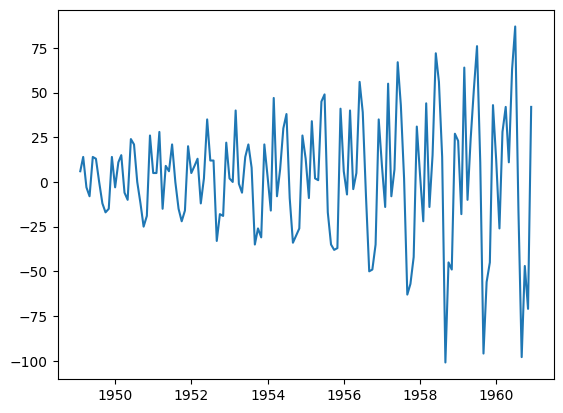

In [ ]:
# De-trending (differencing)

df['diff_1'] = df['Passengers'].diff()

plt.plot(df['diff_1'])
plt.show()

In [ ]:
p_value = adfuller(df['diff_1'].dropna())[1]
p_value

np.float64(0.05421329028382478)

In [ ]:
# p_value now comes with